In [1]:
# 주요 라이브러리 import
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

%config InlineBackend.figure_format = 'retina'
 
# !apt -qq -y install fonts-nanum
# 여기까지하고 런타임 다시 시작!!——> 이 셀부터 설치빼고 다시 실행

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font_name) 
print(font_name)

#fm._rebuild()

NanumBarunGothic


In [2]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

**IBM finance 데이터에 대하여 분석**

In [3]:
finance_df = pd.read_csv('/content/IBM.csv', encoding='utf-8')
finance_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-20,154.225616,155.258133,153.441681,155.162521,122.858292,6785193
1,2017-04-21,154.923523,154.980881,153.326965,153.326965,121.404922,5865759
2,2017-04-24,154.196945,154.464630,153.365204,153.680695,121.684990,5565348
3,2017-04-25,154.665390,154.913956,153.326965,153.336517,121.412460,5083978
4,2017-04-26,153.470367,154.015289,152.858505,153.021027,121.162643,4526879
...,...,...,...,...,...,...,...
1254,2022-04-12,126.419998,127.339996,125.580002,125.980003,125.980003,2691000
1255,2022-04-13,125.639999,126.669998,124.910004,126.139999,126.139999,3064900
1256,2022-04-14,128.929993,130.580002,126.379997,126.559998,126.559998,6382800
1257,2022-04-18,126.599998,127.389999,125.529999,126.169998,126.169998,4884200


**ARIMA**

In [4]:
IBM_df = pd.DataFrame({'day' : finance_df['Date'],
                       'price' : finance_df['Adj Close']
                      })
IBM_df

,day,price
0,2017-04-20,122.858292
1,2017-04-21,121.404922
2,2017-04-24,121.684990
3,2017-04-25,121.412460
4,2017-04-26,121.162643
...,...,...
1254,2022-04-12,125.980003
1255,2022-04-13,126.139999
1256,2022-04-14,126.559998
1257,2022-04-18,126.169998


In [5]:
IBM_df_train = IBM_df.iloc[:1254]
IBM_df_train[:5]

,day,price
0,2017-04-20,122.858292
1,2017-04-21,121.404922
2,2017-04-24,121.684990
3,2017-04-25,121.412460
4,2017-04-26,121.162643


In [6]:
IBM_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     1254 non-null   object 
 1   price   1254 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.7+ KB


In [7]:
IBM_df_train['day'] = pd.to_datetime(IBM_df_train['day'])
IBM_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     1254 non-null   datetime64[ns]
 1   price   1254 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.7 KB


In [8]:
# 객체 생성
model = ARIMA(IBM_df_train.price.values, order=(2, 1, 2))

In [9]:
model_fit = model.fit(trend='c', full_output=True)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


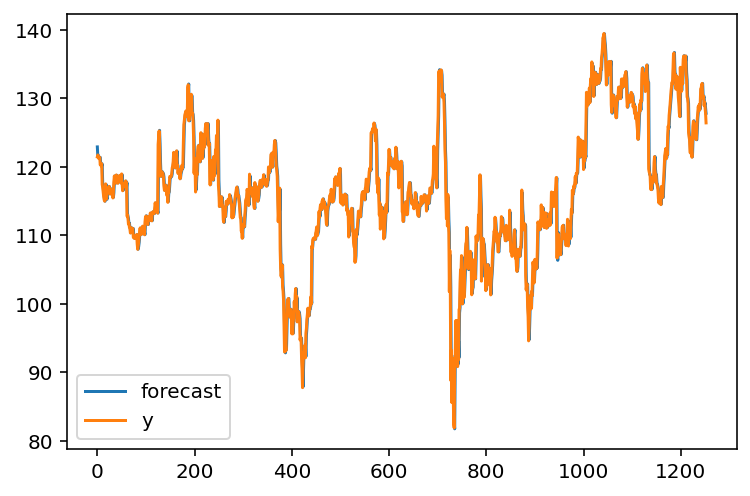

In [10]:
fig = model_fit.plot_predict()

In [11]:
forecast_data = model_fit.forecast(steps=5)
forecast_data

(array([126.43075918, 126.38067796, 126.37862933, 126.38851964,
        126.39166241]),
 array([1.8513963 , 2.53136431, 3.1011635 , 3.58792165, 4.01207574]),
 array([[122.8020891 , 130.05942925],
        [121.41929508, 131.34206084],
        [120.30046056, 132.45679809],
        [119.35632244, 133.42071685],
        [118.52813846, 134.25518636]]))

In [12]:
pred_y = forecast_data[0].tolist()
pred_y

[126.43075917917389,
 126.38067795928288,
 126.37862932849369,
 126.38851964215378,
 126.39166241427738]

In [13]:
IBM_df_test = IBM_df[1254:]
IBM_df_test

,day,price
1254,2022-04-12,125.980003
1255,2022-04-13,126.139999
1256,2022-04-14,126.559998
1257,2022-04-18,126.169998
1258,2022-04-19,129.149994


In [14]:
test_y = IBM_df_test.price.values.tolist()
test_y

[125.980003, 126.139999, 126.559998, 126.169998, 129.149994]

In [15]:
r2_score(test_y, pred_y)

-0.12211414433590662

In [16]:
year_5_mse = mean_squared_error(test_y, pred_y)
year_5_mse

1.5900293868787034

**fbProphet**

In [17]:
# fbprophet : 페이스북에서 제작한 시계열 예측 라이브러리
from fbprophet import Prophet

In [18]:
IBM_df_5_fb = pd.DataFrame({'ds' : finance_df['Date'],
                            'y' : finance_df['Adj Close']
                           })
IBM_df_5_fb

,ds,y
0,2017-04-20,122.858292
1,2017-04-21,121.404922
2,2017-04-24,121.684990
3,2017-04-25,121.412460
4,2017-04-26,121.162643
...,...,...
1254,2022-04-12,125.980003
1255,2022-04-13,126.139999
1256,2022-04-14,126.559998
1257,2022-04-18,126.169998


In [19]:
IBM_df_5_fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      1259 non-null   object 
 1   y       1259 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


In [20]:
IBM_df_5_fb['ds'] = pd.to_datetime(IBM_df_5_fb['ds'])
IBM_df_5_fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1259 non-null   datetime64[ns]
 1   y       1259 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


In [21]:
prophet = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)
prophet.fit(IBM_df_5_fb)

In [22]:
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2017-04-20,8.839895,113.406971,123.325947,8.839895,8.839895,11.793972,11.793972,11.793972,12.416785,...,0.585966,0.585966,0.585966,0.036847,0.036847,0.036847,0.0,0.0,0.0,118.602963
1,2017-04-21,8.833281,113.608770,123.769506,8.833281,8.833281,11.793972,11.793972,11.793972,12.419212,...,0.573311,0.573311,0.573311,0.051929,0.051929,0.051929,0.0,0.0,0.0,118.535674
2,2017-04-24,8.813441,114.240694,123.761968,8.813441,8.813441,11.793972,11.793972,11.793972,12.485227,...,0.592619,0.592619,0.592619,0.098635,0.098635,0.098635,0.0,0.0,0.0,118.851254
3,2017-04-25,8.806828,114.178595,123.862456,8.806828,8.806828,11.793972,11.793972,11.793972,12.504856,...,0.596551,0.596551,0.596551,0.114333,0.114333,0.114333,0.0,0.0,0.0,118.934939
4,2017-04-26,8.800214,113.547736,124.257357,8.800214,8.800214,11.793972,11.793972,11.793972,12.523886,...,0.600046,0.600046,0.600046,0.129867,0.129867,0.129867,0.0,0.0,0.0,119.013088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,2022-04-20,9.555437,123.163151,133.597169,9.555437,9.555437,11.793972,11.793972,11.793972,12.427150,...,0.600046,0.600046,0.600046,0.033131,0.033131,0.033131,0.0,0.0,0.0,128.302285
1260,2022-04-21,9.555101,123.454775,133.549961,9.555101,9.555101,11.793972,11.793972,11.793972,12.428065,...,0.585966,0.585966,0.585966,0.048127,0.048127,0.048127,0.0,0.0,0.0,128.306518
1261,2022-04-22,9.554765,123.007424,133.123947,9.554765,9.554765,11.793972,11.793972,11.793972,12.430728,...,0.573311,0.573311,0.573311,0.063444,0.063444,0.063444,0.0,0.0,0.0,128.327448
1262,2022-04-23,9.554429,104.180304,113.931933,9.554429,9.554429,11.793972,11.793972,11.793972,10.398730,...,-1.474247,-1.474247,-1.474247,0.079004,0.079004,0.079004,0.0,0.0,0.0,108.908356


In [23]:
forecast_data[['ds','yhat','yhat_lower','yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1259,2022-04-20,128.302285,123.163151,133.597169
1260,2022-04-21,128.306518,123.454775,133.549961
1261,2022-04-22,128.327448,123.007424,133.123947
1262,2022-04-23,108.908356,104.180304,113.931933
1263,2022-04-24,109.054518,104.001399,114.211351


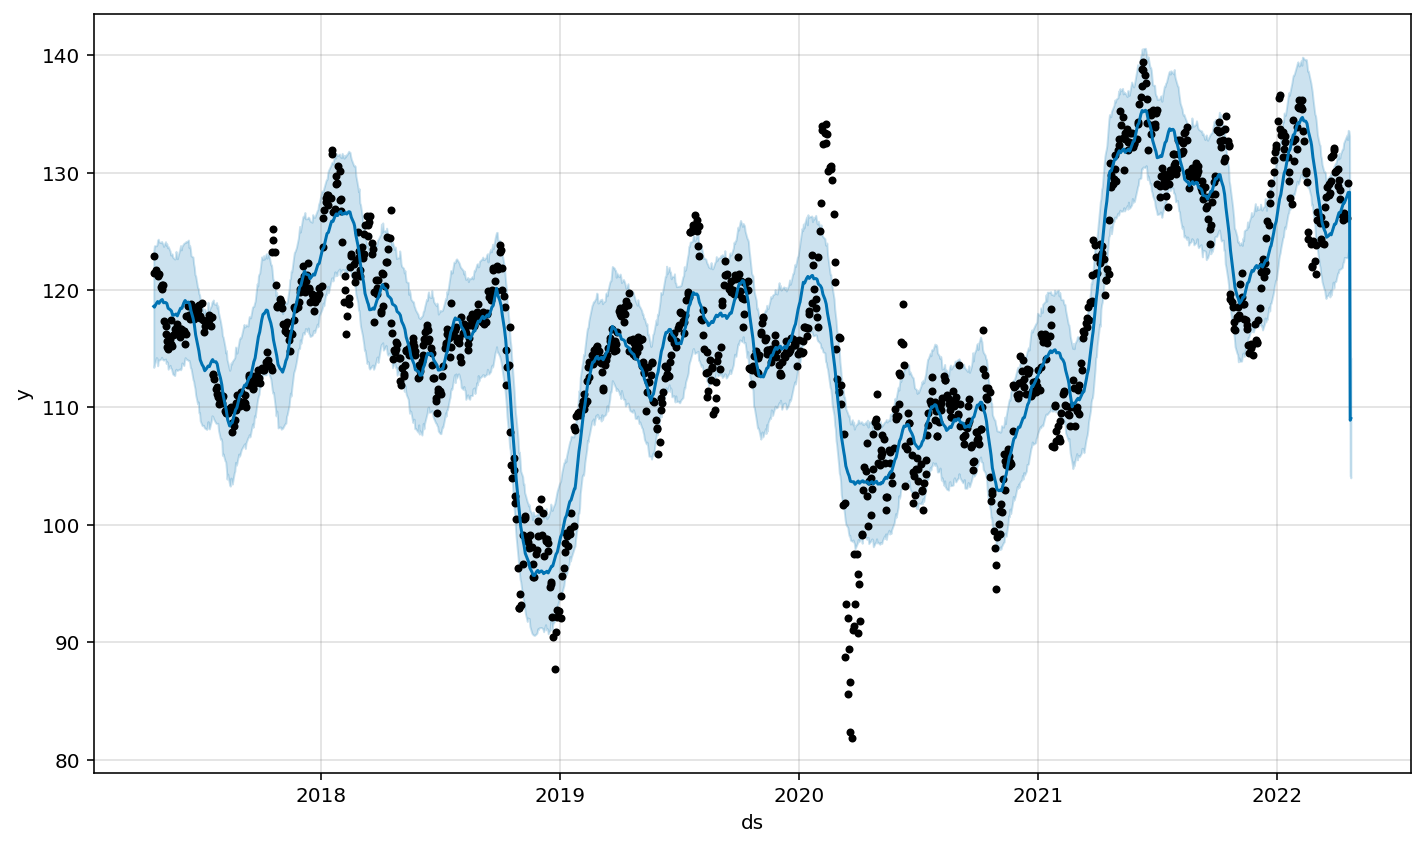

In [24]:
fig = prophet.plot(forecast_data)

**월별, 요일별 트렌드**

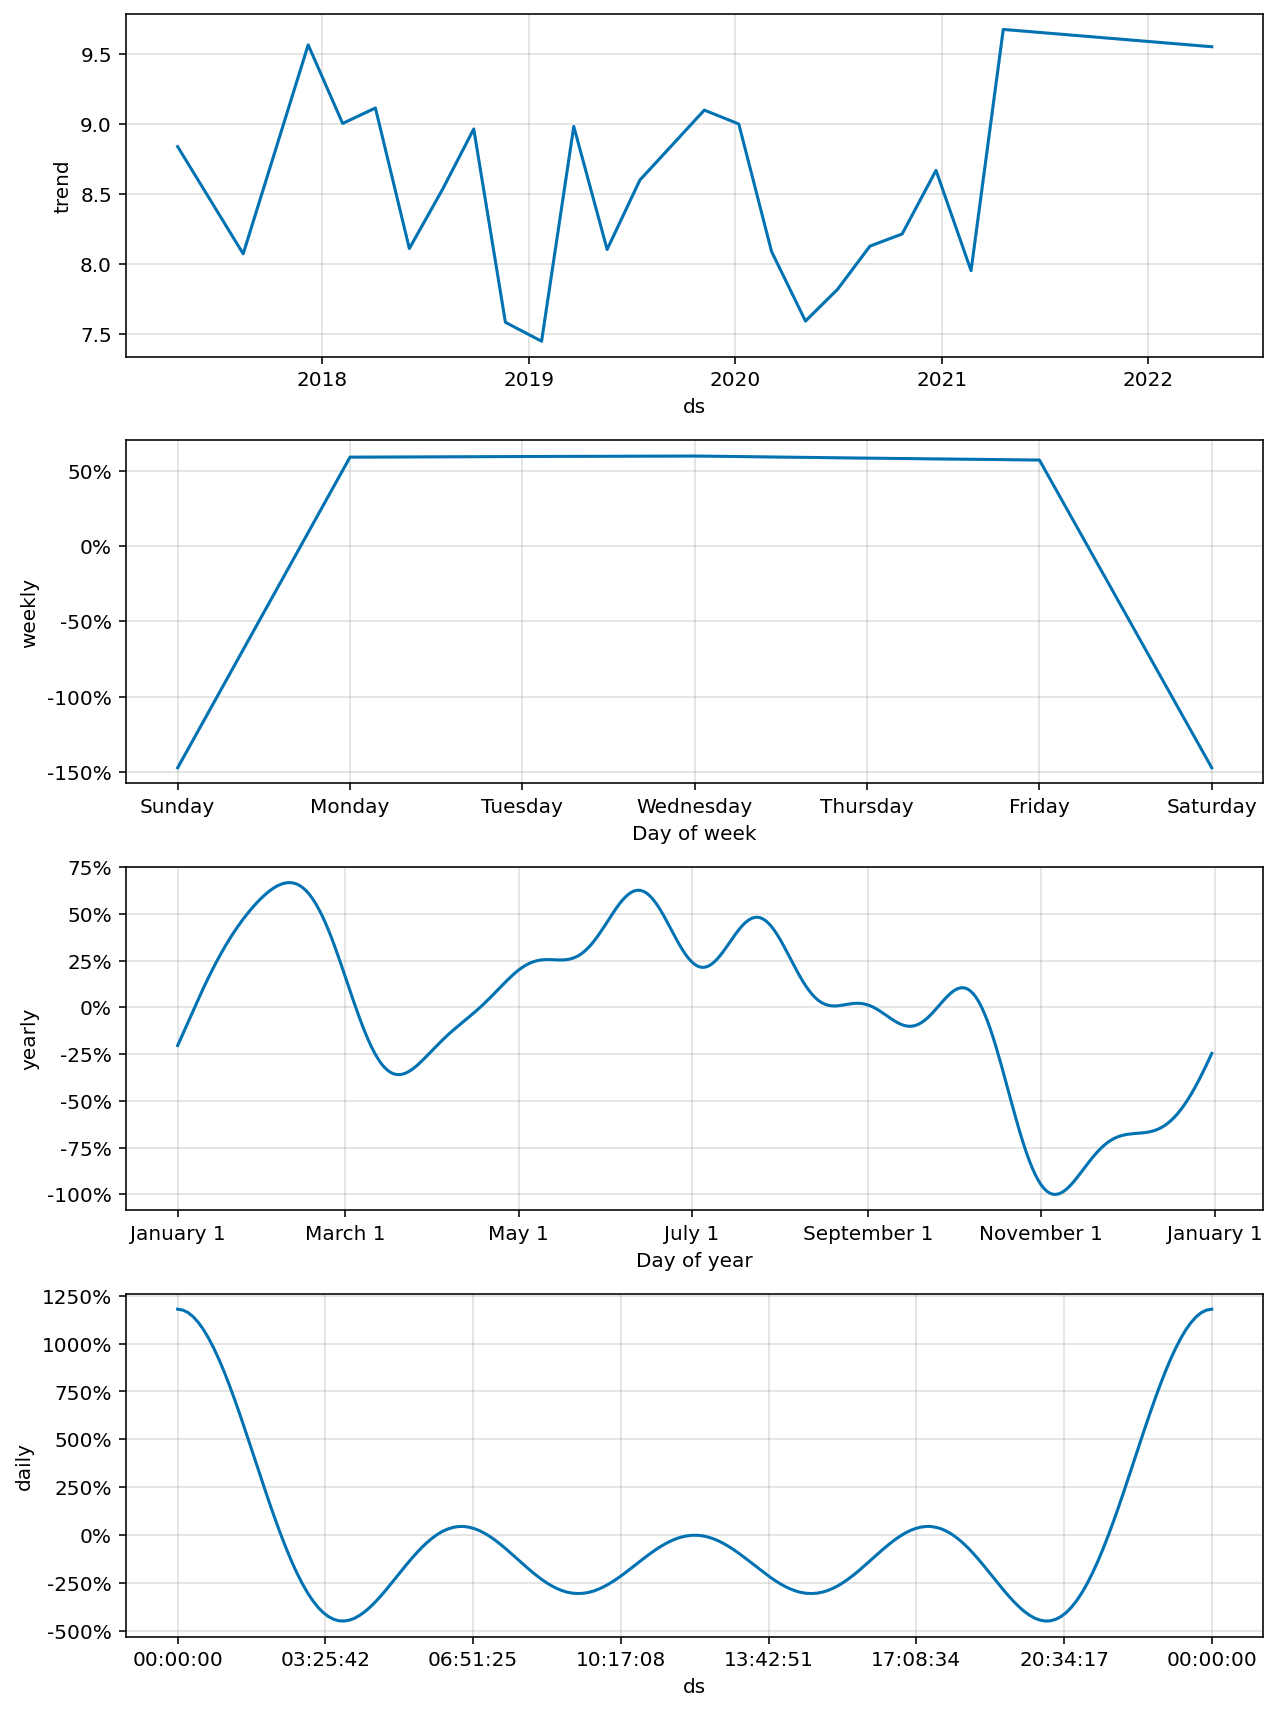

In [25]:
fig2 = prophet.plot_components(forecast_data)

In [26]:
# mse를 구해보자
IBM_df_5_fb.tail(5)

,ds,y
1254,2022-04-12,125.980003
1255,2022-04-13,126.139999
1256,2022-04-14,126.559998
1257,2022-04-18,126.169998
1258,2022-04-19,129.149994


In [27]:
IBM_df_5_fb_train2 = IBM_df_5_fb.iloc[:1254]
IBM_df_5_fb_train2

,ds,y
0,2017-04-20,122.858292
1,2017-04-21,121.404922
2,2017-04-24,121.684990
3,2017-04-25,121.412460
4,2017-04-26,121.162643
...,...,...
1249,2022-04-05,128.889999
1250,2022-04-06,129.389999
1251,2022-04-07,128.550003
1252,2022-04-08,127.730003


In [28]:
IBM_df_5_fb_test2 = IBM_df_5_fb.iloc[1254:]
IBM_df_5_fb_test2

,ds,y
1254,2022-04-12,125.980003
1255,2022-04-13,126.139999
1256,2022-04-14,126.559998
1257,2022-04-18,126.169998
1258,2022-04-19,129.149994


In [29]:
prophet2 = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)
prophet2.fit(IBM_df_5_fb_train2)

In [30]:
future_data2 = prophet2.make_future_dataframe(periods = 5, freq = 'd')
forecast_data2 = prophet2.predict(future_data2)
forecast_data2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2017-04-20,8.327085,113.144755,122.778629,8.327085,8.327085,12.467926,12.467926,12.467926,13.169786,...,0.619924,0.619924,0.619924,0.081936,0.081936,0.081936,0.0,0.0,0.0,117.993015
1,2017-04-21,8.321257,113.448976,122.952597,8.321257,8.321257,12.467926,12.467926,12.467926,13.179964,...,0.606324,0.606324,0.606324,0.105714,0.105714,0.105714,0.0,0.0,0.0,117.995126
2,2017-04-24,8.303773,113.642596,123.271288,8.303773,8.303773,12.467926,12.467926,12.467926,13.269732,...,0.625695,0.625695,0.625695,0.176110,0.176110,0.176110,0.0,0.0,0.0,118.492606
3,2017-04-25,8.297944,113.540519,123.746371,8.297944,8.297944,12.467926,12.467926,12.467926,13.297078,...,0.630437,0.630437,0.630437,0.198714,0.198714,0.198714,0.0,0.0,0.0,118.636357
4,2017-04-26,8.292116,114.042062,123.817362,8.292116,8.292116,12.467926,12.467926,12.467926,13.323110,...,0.634602,0.634602,0.634602,0.220582,0.220582,0.220582,0.0,0.0,0.0,118.768892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2022-04-12,9.159199,123.199265,133.397716,9.159199,9.159199,12.467926,12.467926,12.467926,12.992972,...,0.630437,0.630437,0.630437,-0.105391,-0.105391,-0.105391,0.0,0.0,0.0,128.164416
1255,2022-04-13,9.159336,123.452942,133.259157,9.159336,9.159336,12.467926,12.467926,12.467926,13.018711,...,0.634602,0.634602,0.634602,-0.083817,-0.083817,-0.083817,0.0,0.0,0.0,128.402080
1256,2022-04-14,9.159473,123.653620,133.421563,9.159473,9.159473,12.467926,12.467926,12.467926,13.025898,...,0.619924,0.619924,0.619924,-0.061951,-0.061951,-0.061951,0.0,0.0,0.0,128.469835
1257,2022-04-15,9.159610,123.781434,133.067297,9.159610,9.159610,12.467926,12.467926,12.467926,13.034490,...,0.606324,0.606324,0.606324,-0.039759,-0.039759,-0.039759,0.0,0.0,0.0,128.550455


In [31]:
result_df = pd.DataFrame({
    'day' : IBM_df_5_fb_test2['ds'],
    'real_data' : IBM_df_5_fb_test2['y'],
    'pred_date' : forecast_data2['yhat'].tail(5)
})
result_df

,day,real_data,pred_date
1254,2022-04-12,125.980003,128.164416
1255,2022-04-13,126.139999,128.402080
1256,2022-04-14,126.559998,128.469835
1257,2022-04-18,126.169998,128.550455
1258,2022-04-19,129.149994,108.929655


In [32]:
pb_mse = mean_squared_error(result_df['real_data'], result_df['pred_date'])
pb_mse

85.61296984223777

**ARIMA, fbProphet로 가장 최근의 5일을 예측한 MSE 비교**


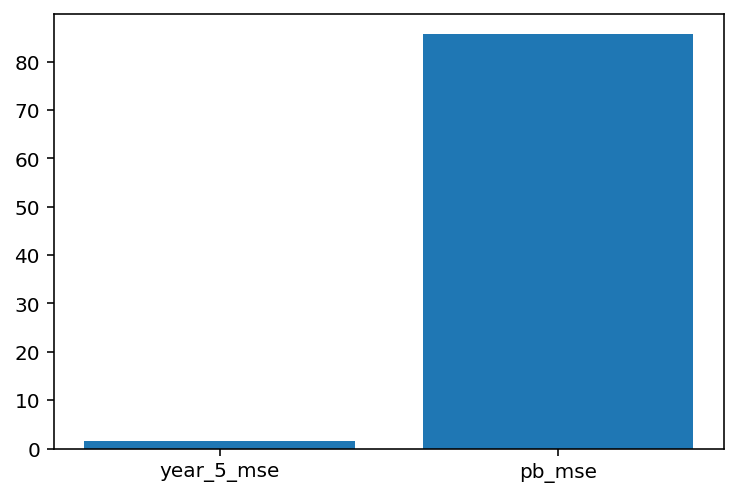

In [33]:
x = np.arange(2)
plt.bar(x, height= [year_5_mse,
                    pb_mse
                    ])
plt.xticks(x, ['year_5_mse',
               'pb_mse'
               ]);